In [32]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


######  # Load the SVHN dataset file Check the keys in the H5PY file to understand the dataset structure Load each dataset split

In [33]:
import h5py
import numpy as np


file_path = r"D:\Dip\dataset\Autonomous_Vehicles_SVHN_single_grey1.h5"


h5_file = h5py.File(file_path, 'r')


print("Keys in dataset:", list(h5_file.keys()))


X_train = np.array(h5_file['X_train'])
y_train = np.array(h5_file['y_train'])
X_val = np.array(h5_file['X_val'])
y_val = np.array(h5_file['y_val'])
X_test = np.array(h5_file['X_test'])
y_test = np.array(h5_file['y_test'])


h5_file.close()


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Keys in dataset: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_val: (60000, 32, 32)
Shape of y_val: (60000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)


###### Normalize the images Reshape the data to (num_samples, height, width, channels)
 ##### SVHN images are grayscale, so channels = 1

In [34]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)


###### define the model and convert into class

In [35]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  

In [36]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [38]:
# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=20, 
                    batch_size=16)


Epoch 1/20
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 54s 21ms/step - accuracy: 0.9236 - loss: 0.2537 - val_accuracy: 0.9457 - val_loss: 0.1952
Epoch 2/20
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 63s 24ms/step - accuracy: 0.9343 - loss: 0.2159 - val_accuracy: 0.9491 - val_loss: 0.1891
Epoch 3/20
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 69s 26ms/step - accuracy: 0.9343 - loss: 0.2105 - val_accuracy: 0.9492 - val_loss: 0.1862
Epoch 4/20
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 63s 24ms/step - accuracy: 0.9410 - loss: 0.1838 - val_accuracy: 0.9493 - val_loss: 0.1870
Epoch 5/20
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 62s 24ms/step - accuracy: 0.9438 - loss: 0.1815 - val_accuracy: 0.9556 - val_loss: 0.1729
Epoch 6/20
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 76s 29ms/step - accuracy: 0.9457 - loss: 0.1729 - val_accuracy: 0.9574 - val_loss: 0.1637
Epoch 7/20
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 72s 28ms/step - accuracy: 0.9465 - loss: 0.1638 - val_accuracy: 0.9574 - val_loss: 0.1638
Epoch 8/20
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 65s 25ms/step - accuracy: 0.9489 -

In [39]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9228 - loss: 0.4980
Test Accuracy: 0.9181110858917236


In [40]:
model.save('svhn_cnn_model.h5')


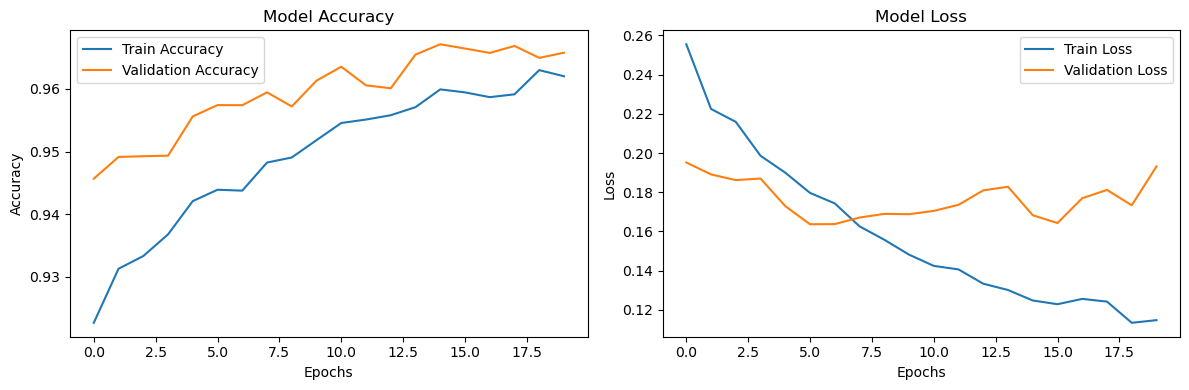

In [41]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
